<a href="https://colab.research.google.com/github/pulkitmehtawork/Keras/blob/master/keras_reuters_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Loading the reuters dataset
from keras.datasets import reuters
(train_data,train_labels) , (test_data,test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
# decoding newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key)for key,value in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

print(decoded_newswire)


? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [7]:
#encoding the data 

import numpy as np 

def vectorize_sequence(sequences , dimension =10000):
	results = np.zeros((len(sequences) , dimension))
	for i, seq in enumerate(sequences):
		results[i,seq] = 1
		
	return results

X_train = vectorize_sequence(train_data)
X_test = vectorize_sequence(test_data)


from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test= to_categorical(test_labels)



In [8]:
# Model definition
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

In [9]:

# compiling model 
model.compile(optimizer ='rmsprop',
			  loss =  'categorical_crossentropy',
			  metrics = ['accuracy'])

In [10]:
# setting aside  validation set 
x_val = X_train[:1000]
x_partial_train = X_train[1000:]

y_val = y_train[:1000]
y_partial_train = y_train[1000:]

In [12]:
# training the model 


history = model.fit(x_partial_train,
					y_partial_train,
					epochs = 20,
					batch_size = 512,
					validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 53ms/step - loss: 2.6389 - accuracy: 0.5198 - val_loss: 1.7244 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4125 - accuracy: 0.7129 - val_loss: 1.2931 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0496 - accuracy: 0.7786 - val_loss: 1.1722 - val_accuracy: 0.7380
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8297 - accuracy: 0.8267 - val_loss: 1.0430 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6595 - accuracy: 0.8629 - val_loss: 0.9833 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.5308 - accuracy: 0.8919 - val_loss: 0.9515 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4237 - accuracy: 0.9146 - val_loss: 0.9248 - val_accuracy: 0.7970
Epoch 8/20
16

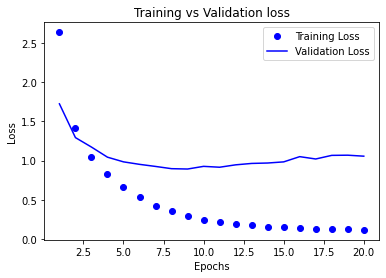

In [14]:
# plot training & validation losses

import matplotlib.pyplot as plt
%matplotlib inline 

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(history_dict['val_loss'])+1)

plt.plot(epochs,loss, 'bo',label = 'Training Loss')
plt.plot(epochs,val_loss, 'b',label = 'Validation Loss')

plt.title('Training vs Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()




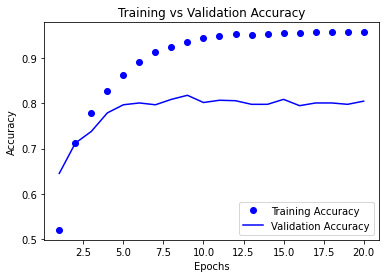

In [15]:
# Training vs validation accuracy
loss = history_dict['accuracy']
val_loss = history_dict['val_accuracy']

epochs = range(1, len(history_dict['val_loss'])+1)

plt.plot(epochs,loss, 'bo',label = 'Training Accuracy')
plt.plot(epochs,val_loss, 'b',label = 'Validation Accuracy')

plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()